Mounted at /content/drive


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import style #style lets us customize our charts

import matplotlib as mpl

import plotly.express as px

import numpy as np

Mounted at /content/drive


In [ ]:
mask = pd.read_csv('/content/mask-use-by-county.csv')

FileNotFoundError: ignored

In [ ]:
us_countries2020=pd.read_csv('/content/us-counties-2020.csv')

In [ ]:
us_countries2021=pd.read_csv('/content/us-counties-2021.csv')

In [ ]:
us_countries2022=pd.read_csv('/content/us-counties-2022.csv')

In [ ]:
us_countries2023=pd.read_csv('/content/us-counties-2023.csv')

In [ ]:
countries_merged = pd.concat([us_countries2020, us_countries2021, us_countries2022,us_countries2023], ignore_index=True)


In [ ]:
countries_merged.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
countries_merged=countries_merged.drop('fips',axis=1)
countries_merged

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
3525156,2023-03-23,Sweetwater,Wyoming,12519,139.0
3525157,2023-03-23,Teton,Wyoming,12150,16.0
3525158,2023-03-23,Uinta,Wyoming,6416,43.0
3525159,2023-03-23,Washakie,Wyoming,2700,51.0


In [ ]:
mask

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [ ]:
#mask['FIPS'] = mask['COUNTYFP'].apply(lambda x: str(x).zfill(5) if len(str(x)) == 4 else x)
#mask=mask.drop('COUNTYFP',axis=1)
mask=mask.set_index('COUNTYFP')
mask

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
COUNTYFP,,,,,
1001,0.053,0.074,0.134,0.295,0.444
1003,0.083,0.059,0.098,0.323,0.436
1005,0.067,0.121,0.120,0.201,0.491
1007,0.020,0.034,0.096,0.278,0.572
1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...
56037,0.061,0.295,0.230,0.146,0.268
56039,0.095,0.157,0.160,0.247,0.340
56041,0.098,0.278,0.154,0.207,0.264


In [ ]:
book2=pd.read_excel('/content/Book2.xlsx')

book2

,FIPS,County
0,01000 Alabama County,NaN
1,01001 Autauga County,NaN
2,01003 Baldwin County,NaN
3,01005 Barbour County,NaN
4,01007 Bibb County,NaN
...,...,...
3190,56037 Sweetwater County,NaN
3191,56039 Teton County,NaN
3192,56041 Uinta County,NaN
3193,56043 Washakie County,NaN


In [ ]:
book2['County'] = book2['FIPS'].str.split().str[1:].str.join(' ')
book2['FIPS'] = book2['FIPS'].str.extract(r'(\d+)')
book2['FIPS']=book2['FIPS'].astype(int)
book2 = book2.rename(columns={'FIPS': 'COUNTYFP'})
book2=book2.set_index('COUNTYFP')
book2

,County
COUNTYFP,
1000,Alabama County
1001,Autauga County
1003,Baldwin County
1005,Barbour County
1007,Bibb County
...,...
56037,Sweetwater County
56039,Teton County
56041,Uinta County


In [ ]:
book2['County'] = book2['County'].str.replace(' County', '')
book2

,County
COUNTYFP,
1000,Alabama
1001,Autauga
1003,Baldwin
1005,Barbour
1007,Bibb
...,...
56037,Sweetwater
56039,Teton
56041,Uinta


In [ ]:

merged_masks_dataset = pd.merge(mask, book2[['County']], on='COUNTYFP', how='inner')

merged_masks_dataset.rename(columns={'County': 'Masked_County'}, inplace=True)

merged_masks_dataset

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Masked_County
COUNTYFP,,,,,,
1001,0.053,0.074,0.134,0.295,0.444,Autauga
1003,0.083,0.059,0.098,0.323,0.436,Baldwin
1005,0.067,0.121,0.120,0.201,0.491,Barbour
1007,0.020,0.034,0.096,0.278,0.572,Bibb
1009,0.053,0.114,0.180,0.194,0.459,Blount
...,...,...,...,...,...,...
56037,0.061,0.295,0.230,0.146,0.268,Sweetwater
56039,0.095,0.157,0.160,0.247,0.340,Teton
56041,0.098,0.278,0.154,0.207,0.264,Uinta


In [ ]:
merged_masks_dataset=merged_masks_dataset.reset_index()
merged_masks_dataset

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Masked_County
0,1001,0.053,0.074,0.134,0.295,0.444,Autauga
1,1003,0.083,0.059,0.098,0.323,0.436,Baldwin
2,1005,0.067,0.121,0.120,0.201,0.491,Barbour
3,1007,0.020,0.034,0.096,0.278,0.572,Bibb
4,1009,0.053,0.114,0.180,0.194,0.459,Blount
...,...,...,...,...,...,...,...
3128,56037,0.061,0.295,0.230,0.146,0.268,Sweetwater
3129,56039,0.095,0.157,0.160,0.247,0.340,Teton
3130,56041,0.098,0.278,0.154,0.207,0.264,Uinta
3131,56043,0.204,0.155,0.069,0.285,0.287,Washakie


In [ ]:
merged_masks_dataset1=merged_masks_dataset.groupby('Masked_County').ALWAYS.sum()
merged_masks_dataset1

Masked_County
Abbeville                    0.371
Acadia Parish                0.362
Accomack                     0.824
Ada                          0.526
Adair                        1.514
                             ...  
Yukon-Koyukuk Census Area    0.358
Yuma                         1.094
Zapata                       0.779
Zavala                       0.635
Ziebach                      0.434
Name: ALWAYS, Length: 1867, dtype: float64

In [ ]:
merged_masks_dataset.to_csv('/content/drive/MyDrive/Unstructured Project/merged_masks_dataset.csv')


NameError: ignored

In [ ]:
countries_merged.to_csv('/content/drive/MyDrive/countries_merged.csv')


In [ ]:
countries_merged

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
3525156,2023-03-23,Sweetwater,Wyoming,12519,139.0
3525157,2023-03-23,Teton,Wyoming,12150,16.0
3525158,2023-03-23,Uinta,Wyoming,6416,43.0
3525159,2023-03-23,Washakie,Wyoming,2700,51.0


In [ ]:
county_totals = countries_merged.groupby(['state','county']).agg({'cases': 'sum', 'deaths': 'sum'})
county_totals

cases    deaths
state   county                      
Alabama Autauga   10936327  143941.0
        Baldwin   38247049  456707.0
        Barbour    3979887   69671.0
        Bibb       4432465   74857.0
        Blount    10428403  165998.0
...                    ...       ...
Wyoming Teton      6532424   11204.0
        Uinta      3737093   24619.0
        Unknown         37       0.0
        Washakie   1581598   31868.0
        Weston     1077591   11453.0

[3278 rows x 2 columns]

In [ ]:
countries_merged1=countries_merged.groupby('county').cases.sum()

In [ ]:
countries_merged1

county
Abbeville                     4275495
Acadia                       11092649
Accomack                      4888828
Ada                          88527923
Adair                        14201484
                               ...   
Yukon-Koyukuk Census Area      870542
Yuma                         47140389
Zapata                        2514457
Zavala                        2698801
Ziebach                        450525
Name: cases, Length: 1932, dtype: int64

#working here


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import style #style lets us customize our charts

import matplotlib as mpl

import plotly.express as px

import numpy as np

Mounted at /content/drive


In [ ]:
mask= pd.read_csv('/content/drive/MyDrive/Unstructured Project/merged_masks_dataset.csv')

In [ ]:
counties2022= pd.read_csv('/content/drive/MyDrive/Unstructured Project/us-counties-2022.csv')

In [ ]:
mask = mask.rename(columns={'Masked_County': 'county'})
mask = mask.rename(columns={'COUNTYFP': 'fips'})

In [ ]:
mask['fips']=mask['fips'].astype(float)

In [ ]:
mask=mask.drop('Unnamed: 0',axis=1)
#counties2022=counties2022.drop('Unnamed: 0',axis=1)

In [ ]:
counties2022=counties2022.drop('date',axis=1)

In [ ]:
mask

,fips,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,county
0,1001.0,0.053,0.074,0.134,0.295,0.444,Autauga
1,1003.0,0.083,0.059,0.098,0.323,0.436,Baldwin
2,1005.0,0.067,0.121,0.120,0.201,0.491,Barbour
3,1007.0,0.020,0.034,0.096,0.278,0.572,Bibb
4,1009.0,0.053,0.114,0.180,0.194,0.459,Blount
...,...,...,...,...,...,...,...
3128,56037.0,0.061,0.295,0.230,0.146,0.268,Sweetwater
3129,56039.0,0.095,0.157,0.160,0.247,0.340,Teton
3130,56041.0,0.098,0.278,0.154,0.207,0.264,Uinta
3131,56043.0,0.204,0.155,0.069,0.285,0.287,Washakie


In [ ]:
counties2022


,county,state,fips,cases,deaths
0,Autauga,Alabama,1001.0,11018,160.0
1,Baldwin,Alabama,1003.0,39911,593.0
2,Barbour,Alabama,1005.0,3860,81.0
3,Bibb,Alabama,1007.0,4533,95.0
4,Blount,Alabama,1009.0,11256,198.0
...,...,...,...,...,...
1188037,Sweetwater,Wyoming,56037.0,12410,136.0
1188038,Teton,Wyoming,56039.0,12010,16.0
1188039,Uinta,Wyoming,56041.0,6305,43.0
1188040,Washakie,Wyoming,56043.0,2721,47.0


In [ ]:
#countries2022 = countries.loc[countries['date'].str.contains('2022-'), :]

In [ ]:
counties2022_grouped=counties2022.groupby(['fips']).agg({'cases':'sum','deaths':'sum'})
counties2022_grouped=pd.DataFrame(counties2022_grouped)
counties2022_grouped

,cases,deaths
fips,,
1001.0,6090102,77547.0
1003.0,21693821,248548.0
1005.0,2218661,36094.0
1007.0,2485493,37884.0
1009.0,5719271,88282.0
...,...,...
72151.0,2522686,0.0
72153.0,2668727,0.0
78010.0,3591357,17841.0


In [ ]:
#merged_df = pd.merge(countries1, mask, on=['fips'], how='inner')
masks_counties_2022 = pd.merge(counties2022_grouped, mask, on=['fips'], how='inner')

In [ ]:
masks_counties_2022

,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,county
0,1001.0,6090102,77547.0,0.053,0.074,0.134,0.295,0.444,Autauga
1,1003.0,21693821,248548.0,0.083,0.059,0.098,0.323,0.436,Baldwin
2,1005.0,2218661,36094.0,0.067,0.121,0.120,0.201,0.491,Barbour
3,1007.0,2485493,37884.0,0.020,0.034,0.096,0.278,0.572,Bibb
4,1009.0,5719271,88282.0,0.053,0.114,0.180,0.194,0.459,Blount
...,...,...,...,...,...,...,...,...,...
3120,56037.0,4166877,46081.0,0.061,0.295,0.230,0.146,0.268,Sweetwater
3121,56039.0,3884382,5764.0,0.095,0.157,0.160,0.247,0.340,Teton
3122,56041.0,2115763,14378.0,0.098,0.278,0.154,0.207,0.264,Uinta
3123,56043.0,899844,16299.0,0.204,0.155,0.069,0.285,0.287,Washakie


In [ ]:
#merged_df.groupby('fips').agg({'cases':'sum','deaths':'sum','ALWAYS':'first'})

In [ ]:
#merged_df.isnull().sum()

In [ ]:
#donot run
#merged_df.to_csv('/content/drive/MyDrive/merged_df.csv')
#merged_df.to_csv('/content/drive/MyDrive/Unstructured Project/merged_df.csv')


In [ ]:
masks_counties_2022['fips'].isnull().sum()

0

In [ ]:
# find duplicates in column
duplicates = masks_counties_2022['fips'].duplicated()

# print the rows that are duplicates
print(masks_counties_2022[duplicates])

Empty DataFrame
Columns: [fips, cases, deaths, NEVER, RARELY, SOMETIMES, FREQUENTLY, ALWAYS, county]
Index: []


In [ ]:
masks_counties_2022['county'].isnull().sum()

0

In [ ]:
masks_counties_2022.sort_values(by=['ALWAYS','cases'], ascending=False)



,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,county
190,6027.0,1794609,20661.0,0.033,0.011,0.008,0.058,0.889,Inyo
1873,36123.0,1370486,14836.0,0.000,0.006,0.023,0.087,0.884,Yates
202,6051.0,1182296,2784.0,0.011,0.026,0.012,0.070,0.880,Mono
2620,48229.0,381652,6389.0,0.013,0.003,0.076,0.029,0.880,Hudspeth
2576,48141.0,80223876,1353608.0,0.007,0.007,0.033,0.075,0.877,El Paso
...,...,...,...,...,...,...,...,...,...
1622,30071.0,391471,10379.0,0.229,0.114,0.214,0.296,0.147,Phillips
1629,30085.0,1226705,26887.0,0.169,0.246,0.178,0.261,0.146,Roosevelt
1614,30055.0,145436,3272.0,0.142,0.274,0.179,0.267,0.139,McCone
1596,30019.0,147690,3285.0,0.172,0.244,0.186,0.269,0.129,Daniels


In [ ]:
masks_counties_2022.to_csv('/content/drive/MyDrive/Unstructured Project/masks_counties_2022.csv')


In [ ]:
plt.hist(merged_df['ALWAYS'])
plt.xlabel('ALWAYS')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#plt.plot(merged_df['fips'], merged_df['cases'], label='cases')
fig = plt.figure(figsize=(15, 8))
plt.plot(merged_df['cases'],merged_df['ALWAYS'], label='ALWAYS')
plt.xlabel('mask-always')
#plt.ylabel('cases')
plt.ylim(0, 2000000000)  # set the y-axis limits to 0 and 40000
plt.legend()
plt.show()


#rohit's file


In [ ]:
testing= pd.read_csv('/content/drive/MyDrive/Unstructured Project/testing_time_series_covid19_US.csv')

In [ ]:
vaccines= pd.read_csv('/content/drive/MyDrive/Unstructured Project/time_series_covid19_vaccine_us.csv')

In [ ]:
testing

In [ ]:
testing.isna().sum()

date                           0
state                          0
cases_conf_probable         1265
cases_confirmed            23032
cases_probable             23082
tests_viral_positive       26710
tests_viral_negative       31189
tests_viral_total          14102
tests_antigen_positive     42864
tests_antigen_total        36375
people_viral_positive       5622
people_viral_total         32816
people_antigen_positive    50125
people_antigen_total       49421
encounters_viral_total     40556
tests_combined_total        5221
dtype: int64

In [ ]:
vaccines['Country_Region'].value_counts()

US    40800
Name: Country_Region, dtype: int64

In [ ]:
vaccines = vaccines.rename(columns={'Province_State': 'state'})

In [ ]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [ ]:
vaccines['state'] = vaccines['state'].map(state_abbreviations)

In [ ]:
vaccines

In [ ]:
vaccines = vaccines.drop(['Country_Region'], axis=1)


In [ ]:
# find duplicates in column
null = vaccines['state'].isna()

# print the rows that are duplicates
print(vaccines[null])


In [ ]:
vaccines = vaccines.dropna(subset=['state'])


In [ ]:
# convert date columns to datetime
vaccines['Date'] = pd.to_datetime(vaccines['Date'])
testing['date'] = pd.to_datetime(testing['date'])

<ipython-input-38-bfa5cd89a607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccines['Date'] = pd.to_datetime(vaccines['Date'])


In [ ]:
# create a Year-Month column in both dataframes
vaccines['Year-Month'] = vaccines['Date'].dt.strftime('%Y-%m')
testing['Year-Month'] = testing['date'].dt.strftime('%Y-%m')

<ipython-input-39-5b9c5c7b72c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccines['Year-Month'] = vaccines['Date'].dt.strftime('%Y-%m')


In [ ]:
#vaccines = vaccines.drop(['UID'], axis=1)
#testing = testing.drop(['Country_Region'], axis=1)
vaccines = vaccines.rename(columns={'Date': 'date'})

In [ ]:
testing.to_csv('/content/drive/MyDrive/Unstructured Project/testing.csv')
vaccines.to_csv('/content/drive/MyDrive/Unstructured Project/vaccines.csv')
testing_ts.to_csv('/content/drive/MyDrive/Unstructured Project/testing_ts.csv')
vaccines_ts.to_csv('/content/drive/MyDrive/Unstructured Project/vaccines_ts.csv')


In [ ]:
testing

,date,state,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total,Year-Month
0,2020-03-06,AK,NaN,NaN,NaN,0.0,27.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,2020-03
1,2020-03-07,AK,NaN,NaN,NaN,0.0,32.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,2020-03
2,2020-03-08,AK,NaN,NaN,NaN,0.0,40.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,2020-03
3,2020-03-09,AK,NaN,NaN,NaN,0.0,59.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2020-03
4,2020-03-10,AK,NaN,NaN,NaN,0.0,76.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52247,2022-09-20,VT,141282.0,132320.0,8962.0,NaN,NaN,3817041.0,NaN,NaN,132320.0,NaN,NaN,NaN,NaN,3817041.0,2022-09
52248,2022-09-20,WA,1803633.0,1803633.0,0.0,NaN,NaN,NaN,NaN,NaN,1803633.0,NaN,NaN,NaN,NaN,NaN,2022-09
52249,2022-09-20,WI,1855829.0,1633962.0,221867.0,1751175.0,16118463.0,17869638.0,NaN,NaN,1633962.0,NaN,NaN,NaN,17869638.0,17869638.0,2022-09
52250,2022-09-20,WV,596709.0,459116.0,137593.0,NaN,NaN,6859819.0,NaN,NaN,459116.0,NaN,NaN,NaN,NaN,6997412.0,2022-09


In [ ]:
vaccines

,date,UID,state,Doses_admin,People_at_least_one_dose,People_fully_vaccinated,Total_additional_doses,Year-Month
7,2020-12-15,84000001,AL,0,0,0,0,2020-12
8,2020-12-15,84000002,AK,0,0,0,0,2020-12
10,2020-12-15,84000004,AZ,0,0,0,0,2020-12
11,2020-12-15,84000005,AR,0,0,0,0,2020-12
12,2020-12-15,84000006,CA,0,0,0,0,2020-12
...,...,...,...,...,...,...,...,...
50590,2023-03-09,84000051,VA,19466660,7771536,6539579,3488228,2023-03
50591,2023-03-09,84000053,WA,17550630,6495373,5795079,3383989,2023-03
50592,2023-03-09,84000054,WV,3087899,1210013,1070043,530178,2023-03
50593,2023-03-09,84000055,WI,12354746,4376529,3972425,2416803,2023-03


In [ ]:
#taking relevant columns
testing_ts= testing[['date', 'state','cases_confirmed','Year-Month']]
vaccines_ts=vaccines[['date','state','People_at_least_one_dose','Year-Month']]

In [ ]:
# NA WITH 0, ASSUMING NO CASES IN THAT DATE

testing_ts['cases_confirmed'] = testing_ts['cases_confirmed'].fillna(0)



<ipython-input-58-59460367a12f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_ts['cases_confirmed'] = testing_ts['cases_confirmed'].fillna(0)


In [ ]:
testing_ts.isna().sum()

date                   0
state                  0
cases_confirmed    23032
Year-Month             0
dtype: int64

In [ ]:
testing_ts

,date,state,cases_confirmed,Year-Month
0,2020-03-06,AK,0.0,2020-03
1,2020-03-07,AK,0.0,2020-03
2,2020-03-08,AK,0.0,2020-03
3,2020-03-09,AK,0.0,2020-03
4,2020-03-10,AK,0.0,2020-03
...,...,...,...,...
52247,2022-09-20,VT,132320.0,2022-09
52248,2022-09-20,WA,1803633.0,2022-09
52249,2022-09-20,WI,1633962.0,2022-09
52250,2022-09-20,WV,459116.0,2022-09


In [ ]:
vaccines_ts

,date,state,People_at_least_one_dose,Year-Month
7,2020-12-15,AL,0,2020-12
8,2020-12-15,AK,0,2020-12
10,2020-12-15,AZ,0,2020-12
11,2020-12-15,AR,0,2020-12
12,2020-12-15,CA,0,2020-12
...,...,...,...,...
50590,2023-03-09,VA,7771536,2023-03
50591,2023-03-09,WA,6495373,2023-03
50592,2023-03-09,WV,1210013,2023-03
50593,2023-03-09,WI,4376529,2023-03


In [ ]:
vaccine_grouped = vaccines_ts.groupby(['state', 'Year-Month'], as_index=False)['People_at_least_one_dose'].sum()
vaccine_grouped

,state,Year-Month,People_at_least_one_dose
0,AK,2020-12,0
1,AK,2021-01,0
2,AK,2021-02,2165234
3,AK,2021-03,6374797
4,AK,2021-04,8377723
...,...,...,...
1395,WY,2022-11,10465494
1396,WY,2022-12,10870384
1397,WY,2023-01,10907394
1398,WY,2023-02,9863020


In [ ]:
testing_grouped = testing_ts.groupby(['state', 'Year-Month'], as_index=False)['cases_confirmed'].sum()
testing_grouped

,state,Year-Month,cases_confirmed
0,AK,2020-03,0.0
1,AK,2020-04,0.0
2,AK,2020-05,0.0
3,AK,2020-06,0.0
4,AK,2020-07,0.0
...,...,...,...
1743,WY,2022-05,3845829.0
1744,WY,2022-06,3815497.0
1745,WY,2022-07,4079318.0
1746,WY,2022-08,4199200.0


In [ ]:
ts_df = pd.merge(vaccine_grouped, testing_grouped, on=['Year-Month'], how='right')
ts_df

,state_x,Year-Month,People_at_least_one_dose,state_y,cases_confirmed
0,NaN,2020-03,NaN,AK,0.0
1,NaN,2020-04,NaN,AK,0.0
2,NaN,2020-05,NaN,AK,0.0
3,NaN,2020-06,NaN,AK,0.0
4,NaN,2020-07,NaN,AK,0.0
...,...,...,...,...,...
62111,VT,2022-09,18010025.0,WY,2744386.0
62112,WA,2022-09,189623591.0,WY,2744386.0
62113,WI,2022-09,128102247.0,WY,2744386.0
62114,WV,2022-09,35649123.0,WY,2744386.0


In [ ]:
ts_df = ts_df.rename(columns={'state_y': 'state_testing','state_x':'state_vaccines'})
ts_df

,state_vaccines,Year-Month,People_at_least_one_dose,state_testing,cases_confirmed
0,NaN,2020-03,NaN,AK,0.0
1,NaN,2020-04,NaN,AK,0.0
2,NaN,2020-05,NaN,AK,0.0
3,NaN,2020-06,NaN,AK,0.0
4,NaN,2020-07,NaN,AK,0.0
...,...,...,...,...,...
62111,VT,2022-09,18010025.0,WY,2744386.0
62112,WA,2022-09,189623591.0,WY,2744386.0
62113,WI,2022-09,128102247.0,WY,2744386.0
62114,WV,2022-09,35649123.0,WY,2744386.0


In [ ]:
#IMPUTING 0 IN People_at_least_one_dose AS no vaacines were available until then

ts_df['People_at_least_one_dose'] = ts_df['People_at_least_one_dose'].fillna(0)
ts_df

,state_vaccines,Year-Month,People_at_least_one_dose,state_testing,cases_confirmed
0,NaN,2020-03,0.0,AK,0.0
1,NaN,2020-04,0.0,AK,0.0
2,NaN,2020-05,0.0,AK,0.0
3,NaN,2020-06,0.0,AK,0.0
4,NaN,2020-07,0.0,AK,0.0
...,...,...,...,...,...
62111,VT,2022-09,18010025.0,WY,2744386.0
62112,WA,2022-09,189623591.0,WY,2744386.0
62113,WI,2022-09,128102247.0,WY,2744386.0
62114,WV,2022-09,35649123.0,WY,2744386.0


In [ ]:
ts_df.loc['Year-Month']

In [ ]:
ts_df.to_csv('/content/drive/MyDrive/Unstructured Project/ts_df.csv')


In [ ]:
ts_df['Year-Month'] = pd.to_datetime(ts_df['Year-Month'], format='%Y-%m')


In [ ]:
type(ts_df['Year-Month'])

pandas.core.series.Series

In [ ]:
ts_df=ts_df.reset_index()

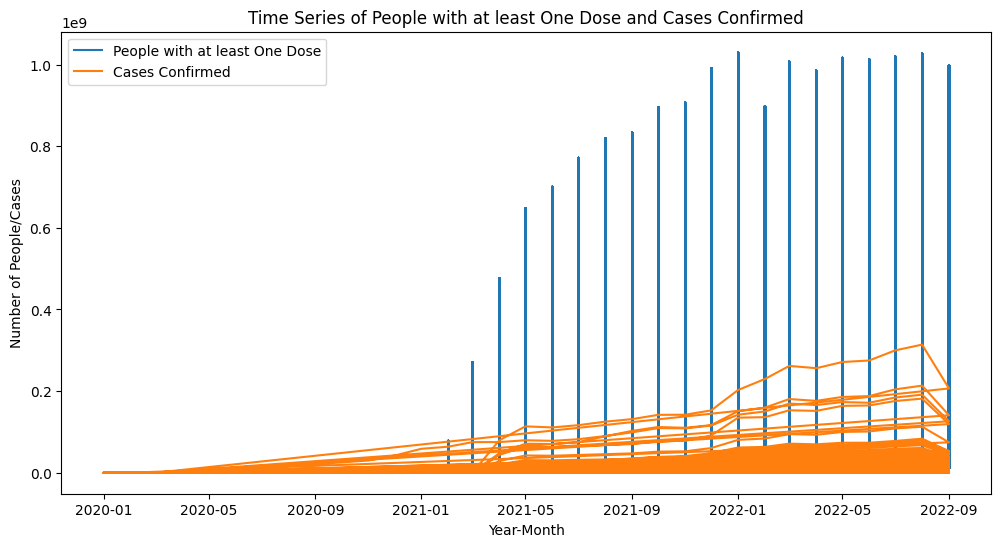

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ts_df['Year-Month'], ts_df['People_at_least_one_dose'], label='People with at least One Dose')
ax.plot(ts_df['Year-Month'], ts_df['cases_confirmed'], label='Cases Confirmed')
ax.set_title('Time Series of People with at least One Dose and Cases Confirmed')
ax.legend(loc='upper left')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of People/Cases')
plt.show()

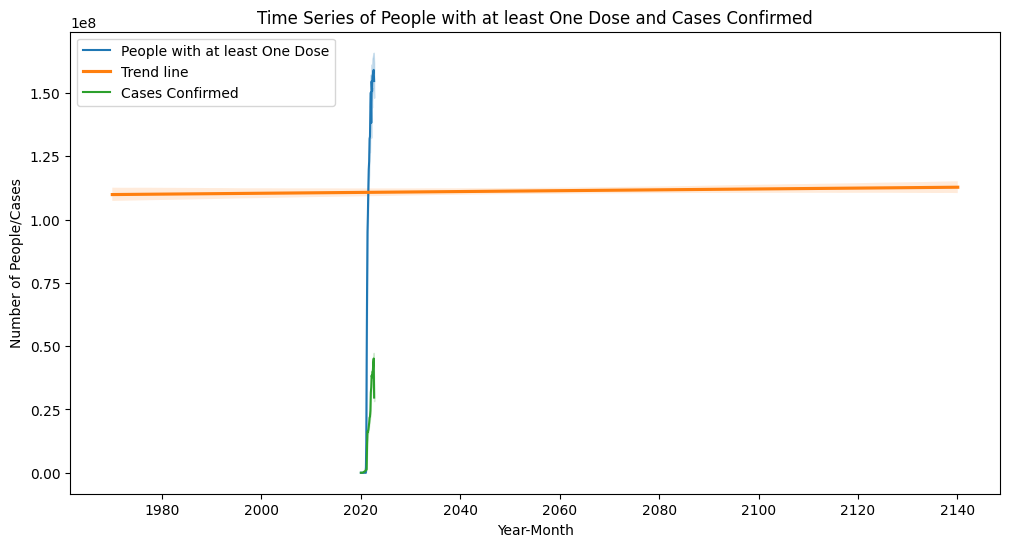

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


ts_df.set_index('Year-Month', inplace=True)

# Create a linear regression model for the People_at_least_one_dose column
x = pd.Series(range(len(ts_df)))
y = ts_df['People_at_least_one_dose']
model = LinearRegression().fit(x.values.reshape(-1,1), y)

# Plot the time series for People_at_least_one_dose and cases_confirmed
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=ts_df['People_at_least_one_dose'], ax=ax, label='People with at least One Dose')
sns.regplot(x=x, y=y, data=ts_df, ax=ax, scatter=False, label='Trend line')
sns.lineplot(data=ts_df['cases_confirmed'], ax=ax, label='Cases Confirmed')
ax.legend(loc='upper left')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of People/Cases')
ax.set_title('Time Series of People with at least One Dose and Cases Confirmed')
plt.show()
